In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기: ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


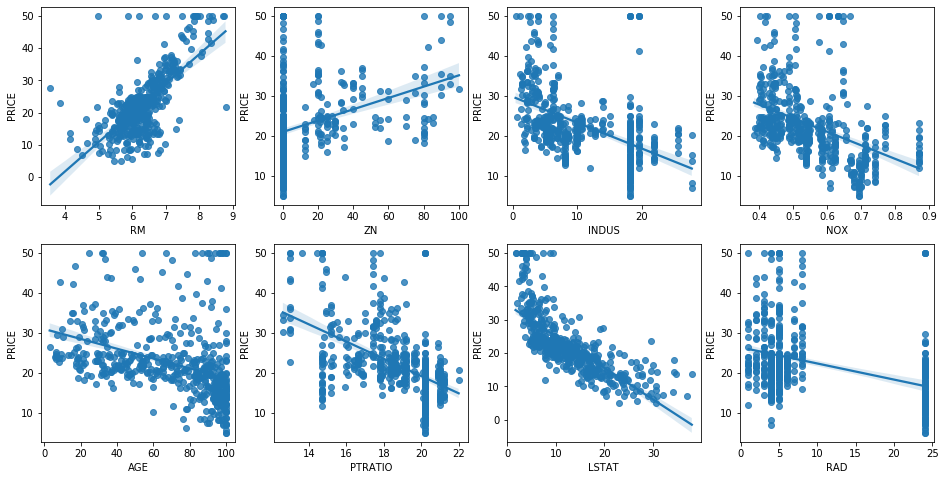

In [3]:
fig, axs = plt.subplots(figsize = (16,8), ncols =4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features) : 
    row=int(i/4)
    col = i%4
    #시본의 regplot을 이요해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score :{0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score :0.757


In [5]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [6]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending =False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [7]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv= 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE: 5.829


In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518


In [14]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas : 
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


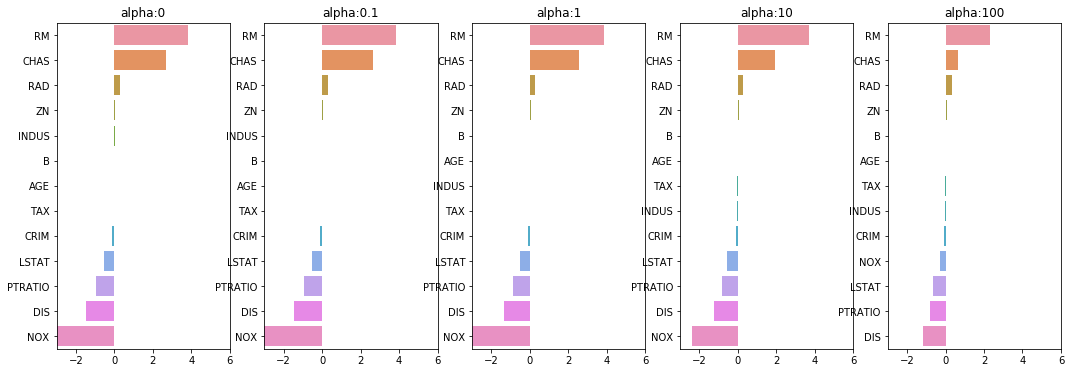

In [19]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data = ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [20]:
ridge_alphas = [0,0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [27]:
from sklearn.linear_model import Lasso, ElasticNet

#alpha값 변화에 따른 회귀 계수 및 RMSD 반환하는 함수 get_linear_reg_eval
def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n=None, verbose=True) :
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name, '######')
    for param in params: 
        if model_name =='Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model= ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                        scoring = "neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alph {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        model.fit(X_data, y_target)
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_reg_eval

In [28]:
#라쏘에 사용된 파라미터 값 정의 및 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n = X_data, y_target_n = y_target)

###### Lasso ######
alph 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alph 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alph 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alph 1일 때 5 폴드 세트의 평균 RMSE: 5.776
alph 3일 때 5 폴드 세트의 평균 RMSE: 6.189


In [29]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [30]:
#엘라스틱넷 회귀
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n = X_data, y_target_n = y_target)

###### ElasticNet ######
alph 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alph 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alph 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alph 1일 때 5 폴드 세트의 평균 RMSE: 5.597
alph 3일 때 5 폴드 세트의 평균 RMSE: 6.068


In [31]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

def get_scaled_data(method='None', p_degree=None, input_data = None):
    if method == 'Standard' : 
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax' :
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log' :
        scaled_data = np.log1p(input_data)
    else :
        scaled_data = input_data
    
    
    if p_degree != None :
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                        include_bias=False).fit_transform(scaled_data)
        
    return scaled_data

In [40]:

alphas = [0.1, 1 ,10, 100]

scale_methods = [(None, None), ('Standard', None), ('Standard', 2), 
                ('MinMax', None), ('MinMax', 2), ('Log',None)]
for scale_method in scale_methods : 
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree= scale_method[1],
                                   input_data = X_data)
    print('\n##변환 유형 :{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                       y_target_n = y_target, verbose=False)


##변환 유형 :None, Polynomial Degree:None
alph 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788
alph 1일 때 5 폴드 세트의 평균 RMSE: 5.653
alph 10일 때 5 폴드 세트의 평균 RMSE: 5.518
alph 100일 때 5 폴드 세트의 평균 RMSE: 5.330

##변환 유형 :Standard, Polynomial Degree:None
alph 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826
alph 1일 때 5 폴드 세트의 평균 RMSE: 5.803
alph 10일 때 5 폴드 세트의 평균 RMSE: 5.637
alph 100일 때 5 폴드 세트의 평균 RMSE: 5.421

##변환 유형 :Standard, Polynomial Degree:2
alph 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827
alph 1일 때 5 폴드 세트의 평균 RMSE: 6.871
alph 10일 때 5 폴드 세트의 평균 RMSE: 5.485
alph 100일 때 5 폴드 세트의 평균 RMSE: 4.634

##변환 유형 :MinMax, Polynomial Degree:None
alph 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764
alph 1일 때 5 폴드 세트의 평균 RMSE: 5.465
alph 10일 때 5 폴드 세트의 평균 RMSE: 5.754
alph 100일 때 5 폴드 세트의 평균 RMSE: 7.635

##변환 유형 :MinMax, Polynomial Degree:2
alph 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298
alph 1일 때 5 폴드 세트의 평균 RMSE: 4.323
alph 10일 때 5 폴드 세트의 평균 RMSE: 5.185
alph 100일 때 5 폴드 세트의 평균 RMSE: 6.538

##변환 유형 :Log, Polynomial Degree:None
alph 0.1일 때 5 폴드 세트의 평균 RMSE: 4.770
alph 1일 때 5 폴드 세트의 평